In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [1]:
!pip install pennylane
from IPython.display import clear_output
clear_output()

In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Loading Raw Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [4]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [6]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [7]:
num_sample = 200
n_class = 4
mult_test = 0.25

X_train = x_train_list[0][:num_sample, :]
X_test = x_test_list[0][:int(mult_test*num_sample), :]

Y_train = np.zeros((n_class*X_train.shape[0],), dtype=int)
Y_test = np.zeros((n_class*X_test.shape[0],), dtype=int)

for i in range(n_class-1):
  X_train = np.concatenate((X_train, x_train_list[i+1][:num_sample, :]), axis=0)
  Y_train[num_sample*(i+1):num_sample*(i+2)] = int(i+1)

  X_test = np.concatenate((X_test, x_test_list[i+1][:int(mult_test*num_sample), :]), axis=0)
  Y_test[int(mult_test*num_sample*(i+1)):int(mult_test*num_sample*(i+2))] = int(i+1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 784) (800,)
(200, 784) (200,)


# Dataset Preprocessing (Standardization + PCA)

## Standardization

In [8]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [9]:
X_train, mu_train, std_train = normalize(X_train)
X_train.shape, Y_train.shape

((800, 784), (800,))

In [10]:
X_test = (X_test - mu_train)/(std_train + 1e-8)
X_test.shape, Y_test.shape

((200, 784), (200,))

## PCA

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [12]:
num_component = 12
pca = PCA(n_components=num_component, svd_solver='full')

In [13]:
pca.fit(X_train)

PCA(n_components=12, svd_solver='full')

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11187049, 0.17426217, 0.22255275, 0.26823812, 0.29848662,
       0.32845008, 0.35463849, 0.37642907, 0.39726625, 0.41665801,
       0.43362531, 0.45000593])

In [15]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [16]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 12) (800,)
(200, 12) (200,)


## Norm

In [17]:
X_train = (X_train.T / np.sqrt(np.sum(X_train ** 2, -1))).T
X_test = (X_test.T / np.sqrt(np.sum(X_test ** 2, -1))).T

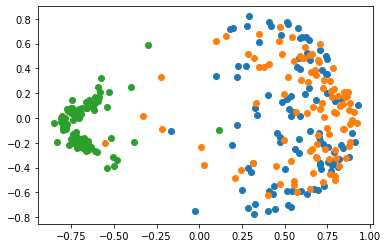

In [18]:
plt.scatter(X_train[:100, 0], X_train[:100, 1])
plt.scatter(X_train[100:200, 0], X_train[100:200, 1])
plt.scatter(X_train[200:300, 0], X_train[200:300, 1])

## Binary Rep

In [19]:
def dec2bin(y_class, n_qubit):
    temp = bin(y_class).replace('b', '')[1:]
    out = np.zeros((n_qubit,))
    
    if len(temp) > n_qubit:
        print("Number of qubit can't be lowered than the binary representation of the class decimal number.")
        return None
    elif len(temp) < n_qubit:
        for i in range(n_qubit-len(temp)):
            temp = '0' + temp
    
    for i in range(len(out)):
        out[i] = temp[i]
        
    return out

In [20]:
temp_train = np.zeros((len(Y_train), 2))

for i in range(len(Y_train)):
    temp_train[i] = dec2bin(Y_train[i], 2)
    
    
temp_test = np.zeros((len(Y_test), 2))

for i in range(len(Y_test)):
    temp_test[i] = dec2bin(Y_test[i], 2)
    
    
Y_train = temp_train
Y_test = temp_test

Y_train.shape, Y_test.shape

((800, 2), (200, 2))

# Quantum

In [21]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

qml.enable_tape()


# Set a random seed
np.random.seed(42)

In [25]:
# Define output labels as quantum state vectors

# def density_matrix(state):
#     """Calculates the density matrix representation of a state.

#     Args:
#         state (array[complex]): array representing a quantum state vector

#     Returns:
#         dm: (array[complex]): array representing the density matrix
#     """
#     return state * np.conj(state).T


label_0 = [[1], [0]]
label_1 = [[0], [1]]


def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return np.outer(state,  np.conj(state))

state_labels = [label_0, label_1]
#state_labels = np.loadtxt('./tetra_states.txt', dtype=np.complex_)

In [27]:
dm_labels = [density_matrix(state_labels[i]) for i in range(2)]
len(dm_labels)

2

In [29]:
n_qubits = 2  # number of bin rep
dev_fc = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][q][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][q][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [30]:
X_train[0].shape

(12,)

In [31]:
a = np.random.uniform(size=(2, 1, 2, 12))

q_fc(a, X_train[0])

tensor([0.7541333 , 0.29930686], requires_grad=True)

In [32]:
from keras import backend as K


# Alpha Custom Layer
class class_weights(tf.keras.layers.Layer):
    def __init__(self):
        super(class_weights, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(1, 2), dtype="float32"),
            trainable=True,
        )

    def call(self, inputs):
        return (inputs * self.w)

In [33]:
n_component = 12
num_bin_rep = 2

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum FC Layer
num_fc_layer = 5
q_fc_layer_0 = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, num_bin_rep, n_component)}, output_dim=num_bin_rep)(X)

# Alpha Layer
alpha_layer_0 = class_weights()(q_fc_layer_0)

model = tf.keras.Model(inputs=X, outputs=alpha_layer_0)

In [34]:
model(X_train[0:32])

<tf.Tensor: shape=(32, 2), dtype=float32, numpy=
array([[-0.00111859, -0.00131297],
       [-0.00111933, -0.00124601],
       [-0.00111279, -0.00087614],
       [-0.00111657, -0.00102929],
       [-0.00111814, -0.00109836],
       [-0.00111799, -0.00130822],
       [-0.00111842, -0.00111054],
       [-0.00111717, -0.00151202],
       [-0.00110366, -0.00048651],
       [-0.00111343, -0.00059481],
       [-0.00111   , -0.00064973],
       [-0.00110805, -0.00067656],
       [-0.00111137, -0.00065954],
       [-0.00111684, -0.00151973],
       [-0.00111769, -0.00193167],
       [-0.00110236, -0.00061009],
       [-0.00111955, -0.00142054],
       [-0.0011196 , -0.0018235 ],
       [-0.00112019, -0.00229806],
       [-0.00110745, -0.00050649],
       [-0.00110589, -0.00065529],
       [-0.00110834, -0.00114972],
       [-0.00111126, -0.0009848 ],
       [-0.00110022, -0.00046646],
       [-0.00109909, -0.00060423],
       [-0.00111547, -0.00108565],
       [-0.00108563, -0.00061334],
      

In [35]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [36]:
H = model.fit(X_train, Y_train, epochs=10, batch_size=32, initial_epoch=0,
              validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
25/25 [==============================] - 954s 38s/step - loss: 0.3248 - accuracy: 0.5893 - val_loss: 0.1520 - val_accuracy: 0.6350
Epoch 2/10
25/25 [==============================] - 943s 38s/step - loss: 0.0838 - accuracy: 0.7379 - val_loss: 0.0629 - val_accuracy: 0.8050
Epoch 3/10
25/25 [==============================] - 949s 38s/step - loss: 0.0423 - accuracy: 0.7549 - val_loss: 0.0490 - val_accuracy: 0.7350
Epoch 4/10
25/25 [==============================] - 948s 38s/step - loss: 0.0504 - accuracy: 0.7535 - val_loss: 0.0474 - val_accuracy: 0.8500
Epoch 5/10
25/25 [==============================] - 941s 38s/step - loss: 0.0399 - accuracy: 0.7891 - val_loss: 0.0353 - val_accuracy: 0.8750
Epoch 6/10
25/25 [==============================] - 962s 38s/step - loss: 0.0365 - accuracy: 0.7711 - val_loss: 0.0393 - val_accuracy: 0.7800
Epoch 7/10
25/25 [==============================] - 964s 39s/step - loss: 0.0354 - accuracy: 0.7534 - val_loss: 0.0361 - val_accuracy: 0.8400
Epoch 

In [37]:
# 5 layer, 12 principal components, bin rep
H.history

{'loss': [0.23677390813827515,
  0.07572712749242783,
  0.04779141768813133,
  0.05203495919704437,
  0.043044544756412506,
  0.038782525807619095,
  0.03852628171443939,
  0.03712741285562515,
  0.04000716283917427,
  0.03417268022894859],
 'accuracy': [0.6037499904632568,
  0.7562500238418579,
  0.7950000166893005,
  0.762499988079071,
  0.7737500071525574,
  0.7649999856948853,
  0.7524999976158142,
  0.7850000262260437,
  0.7612500190734863,
  0.7987499833106995],
 'val_loss': [0.15202033519744873,
  0.06292619556188583,
  0.04897872358560562,
  0.04738635942339897,
  0.03527849540114403,
  0.03925807774066925,
  0.03610711172223091,
  0.04155481979250908,
  0.04610034450888634,
  0.03965465724468231],
 'val_accuracy': [0.6349999904632568,
  0.8050000071525574,
  0.7350000143051147,
  0.8500000238418579,
  0.875,
  0.7799999713897705,
  0.8399999737739563,
  0.7549999952316284,
  0.8600000143051147,
  0.8100000023841858]}